In [10]:
# JUst a start; review and resvise, adding more features and descriptions.

# MLPClassifier with Scikit-Learn

This notebook demonstrates how to use the `MLPClassifier` from `scikit-learn` for classification and regression.

---



## Introduction to Neural Networks

A **neural network** consists of layers of interconnected nodes (neurons), inspired by the human brain. The simplest neural network, a **multilayer perceptron (MLP)**, includes:
- **Input layer**: receives features.
- **Hidden layers**: perform nonlinear transformations using activation functions.
- **Output layer**: produces the final prediction.

Each connection has an associated **weight**, and each neuron typically has a **bias** term. During training, the model adjusts weights to minimize prediction error.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform


## Moons Dataset Revisited
---

In [2]:
# Generate synthetic dataset (moons)
X, y = make_moons(n_samples = 1000, noise = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split into validation data
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [3]:
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (700, 2)
X_val shape: (150, 2)
X_test shape: (150, 2)


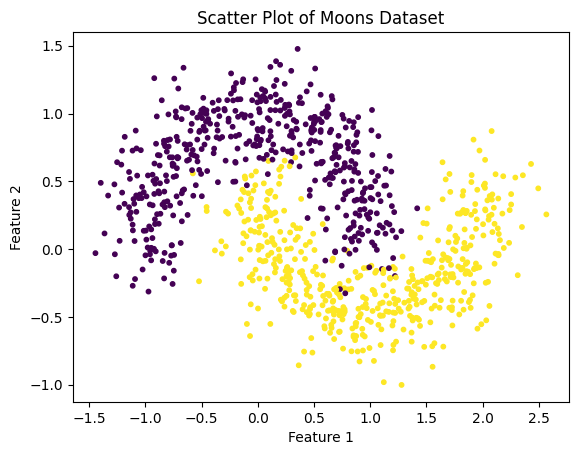

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=10)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Moons Dataset")
plt.show()

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000, random_state = 42)
mlp.fit(X_train, y_train)

c:\Users\rhodes8\AppData\Local\miniconda3\envs\rfgap\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=10, max_iter=1000, random_state=42)

In [6]:
mlp.predict(X_val)
y_pred_val = mlp.predict(X_val)
print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))


Validation set classification report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        74
           1       0.97      0.96      0.97        76

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



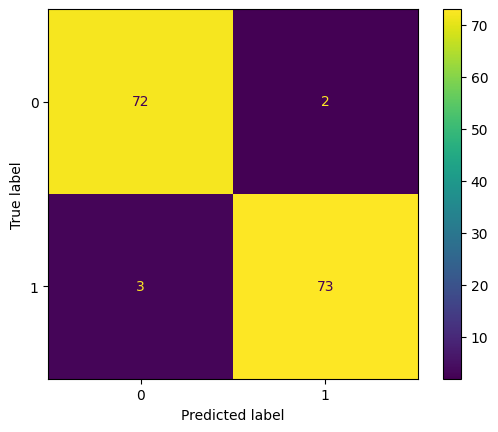

In [7]:
ConfusionMatrixDisplay.from_predictions(y_val, y_pred_val)
plt.show()


In [8]:
# Visualization: decision boundary
def plot_decision_boundary(model, X, y, ax):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title("MLPClassifier Decision Boundary")




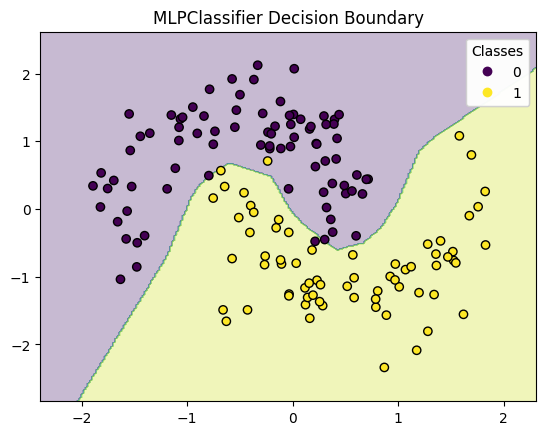

In [9]:
fig, ax = plt.subplots()
plot_decision_boundary(mlp, X_test, y_test, ax)
plt.show()

## Visualizing the Loss Curve

You can monitor training progress by inspecting the loss curve:

# TODO: Look at Partial Fit for loss curve on val set?

Text(0.5, 1.0, 'Training Loss Curve')

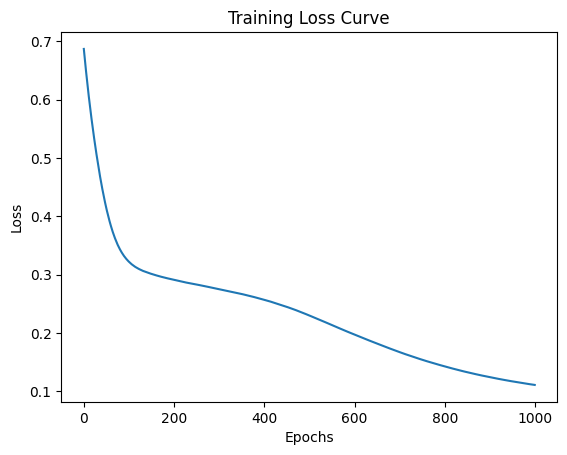

In [11]:
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")

## Activation Functions

Activation functions introduce non-linearity into the network. Common ones include:
- **ReLU (Rectified Linear Unit)**: `f(x) = max(0, x)`
- **Sigmoid**: `f(x) = 1 / (1 + exp(-x))`
- **Tanh**: `f(x) = tanh(x)`

Different activations affect learning dynamics. Historically, **Sigmoid** was important due to its connection with Logistic Regression. In practice, **ReLU** is most frequently used today due to faster training times and help with the vanishing gradient problem.


In [12]:
activations = ['identity', 'logistic', 'tanh', 'relu']

In [ ]:
models = {}
scores = {}
for activation in activations:
    mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, activation=activation, random_state=42)
    mlp.fit(X_train, y_train)
    models[activation] = mlp
    scores[activation] = mlp.score(X_val, y_val)


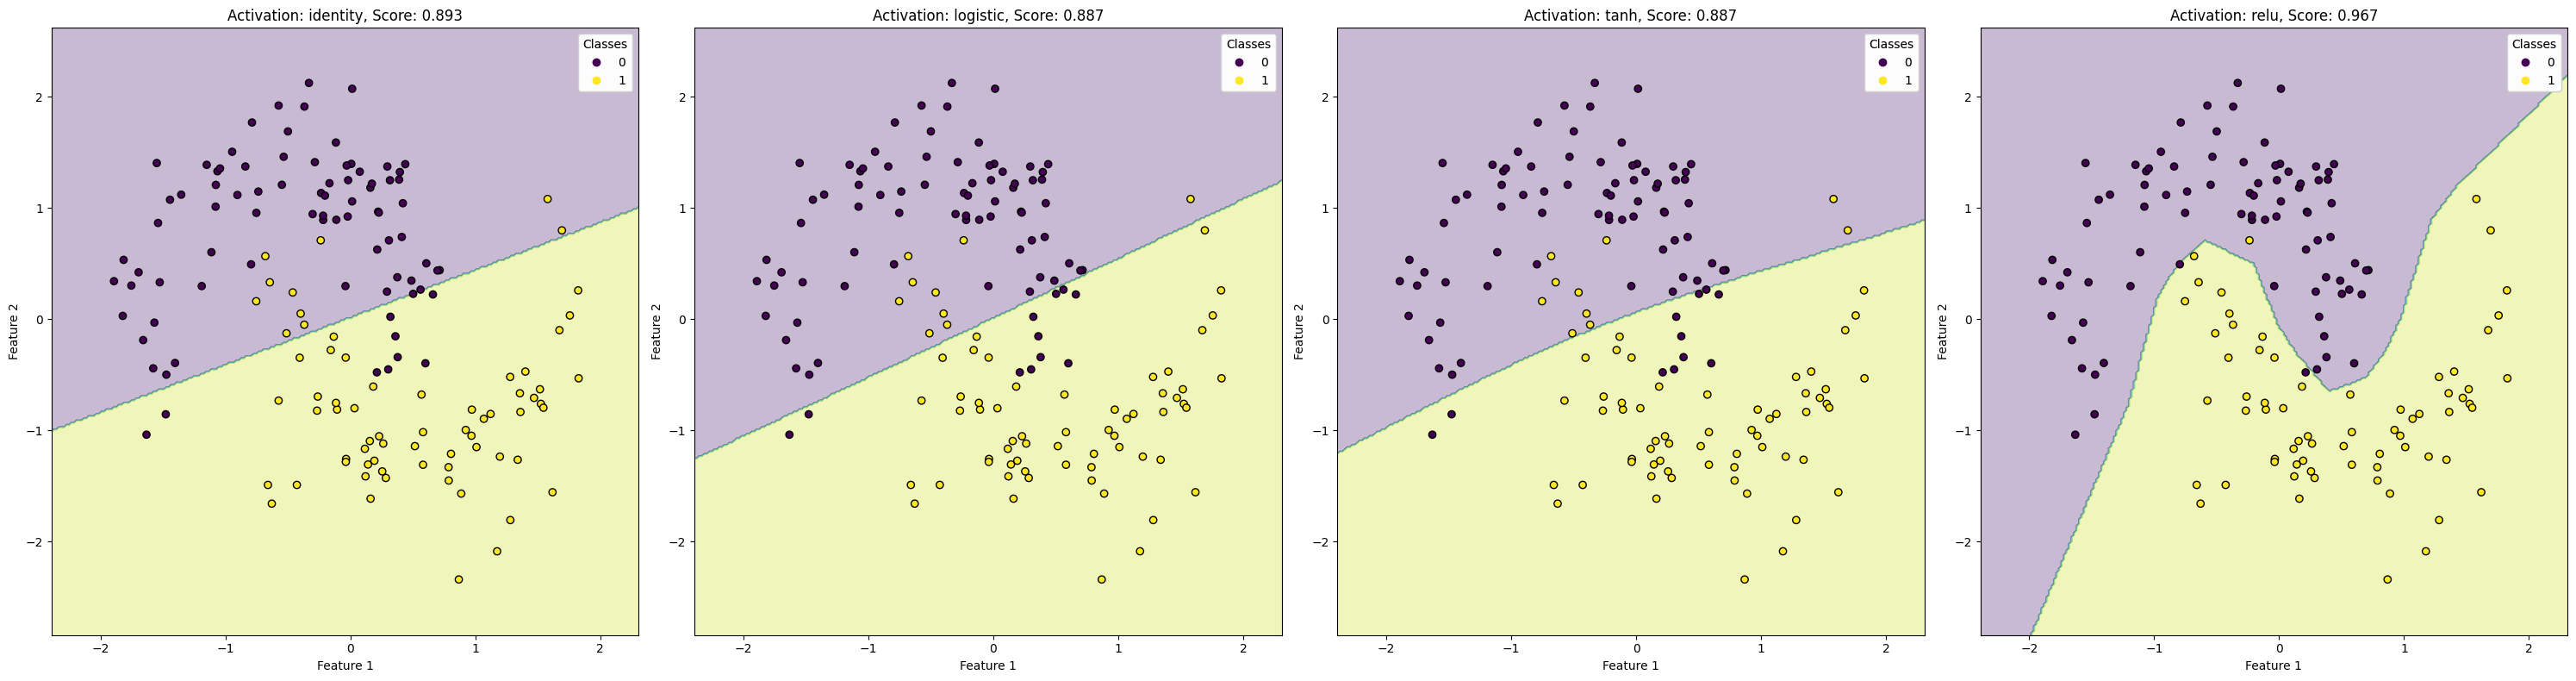

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(30, 8))

for i, (activation, model) in enumerate(models.items()):
    score = scores[activation]
    plot_decision_boundary(model, X_test, y_test, ax[i])
    ax[i].set_title(f"Activation: {activation}, Score: {np.round(score, 3)}")  # Set title after plotting
    ax[i].set_xlabel("Feature 1")
    ax[i].set_ylabel("Feature 2")
plt.tight_layout()


## Hidden Layer Sizes

The `hidden_layer_sizes` parameter controls the number and size of hidden layers, e.g.:
- `(10,)`: one hidden layer with 10 neurons
- `(100,)`: one large hidden layer
- `(50, 30)`: two hidden layers with 50 and 30 neurons

In [20]:
hidden_sizes = [(1,), (2,), (10,), (50,), (100,), (10, 10), (50, 10), (100, 100)]

In [21]:
for sizes in hidden_sizes:
    mlp = MLPClassifier(hidden_layer_sizes=sizes, max_iter=1000, activation='relu', random_state=42)
    mlp.fit(X_train, y_train)
    y_pred_val = mlp.predict(X_val)
    print(f"Hidden sizes: {sizes}")
    print("Validation set classification report:")
    print('Accuracy:', mlp.score(X_val, y_val), '\n')

Hidden sizes: (1,)
Validation set classification report:
Accuracy: 0.88 

Hidden sizes: (2,)
Validation set classification report:
Accuracy: 0.88 



c:\Users\rhodes8\AppData\Local\miniconda3\envs\rfgap\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Hidden sizes: (10,)
Validation set classification report:
Accuracy: 0.9666666666666667 

Hidden sizes: (50,)
Validation set classification report:
Accuracy: 0.9733333333333334 

Hidden sizes: (100,)
Validation set classification report:
Accuracy: 0.9733333333333334 

Hidden sizes: (10, 10)
Validation set classification report:
Accuracy: 0.9666666666666667 

Hidden sizes: (50, 10)
Validation set classification report:
Accuracy: 0.98 

Hidden sizes: (100, 100)
Validation set classification report:
Accuracy: 0.9733333333333334 



## Overfitting and Regularization

Train a model with large hidden layers to observe overfitting (high train accuracy, low test accuracy).

Then mitigate using L2 regularization:

```python
mlp = MLPClassifier(hidden_layer_sizes=(100,), alpha=0.01)
```

You can also conceptually introduce **dropout** and **early stopping** as regularization strategies.


In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, activation='relu', random_state=42, alpha = 10)
mlp.fit(X_train, y_train)

y_pred_val = mlp.predict(X_val)
print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))

Validation set classification report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.88      0.89      0.89        76

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



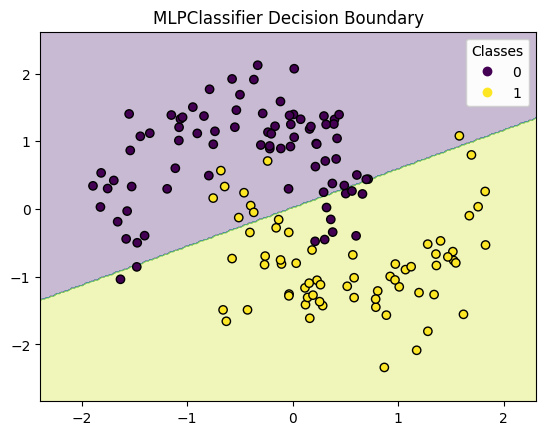

In [ ]:
fig, ax = plt.subplots()
plot_decision_boundary(mlp, X_test, y_test, ax)

## Hyperparameter tuning
___

In [42]:
params = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (150,)], # Number of neurons in each hidden layer
    'activation': ['tanh'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05], # Regularization parameter
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1], # Initial learning rate
    'max_iter': [1000],
}

cv = RandomizedSearchCV(mlp, params, n_iter=15, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [43]:
cv = RandomizedSearchCV(mlp, param_distributions = params, n_iter=10, cv=3, random_state=42)
cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=MLPClassifier(alpha=10, hidden_layer_sizes=10,
                                           max_iter=1000, random_state=42),
                   param_distributions={'activation': ['tanh'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(10,), (50,),
                                                               (100,), (150,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'learning_rate_init': [0.001, 0.01,
                                                               0.1],
                                        'max_iter': [1000],
                                        'solver': ['sgd', 'adam']},
                   random_state=42)

In [44]:
cv.best_score_

0.9657263734516953

In [45]:
cv.best_params_

{'solver': 'adam',
 'max_iter': 1000,
 'learning_rate_init': 0.01,
 'learning_rate': 'adaptive',
 'hidden_layer_sizes': (50,),
 'alpha': 0.05,
 'activation': 'tanh'}

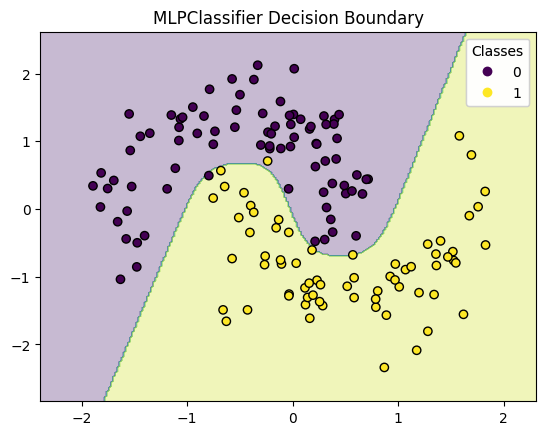

In [46]:
fig, ax = plt.subplots()
plot_decision_boundary(cv.best_estimator_, X_test, y_test, ax)
plt.show()

## MNIST Data

In [47]:
mnist = fetch_openml('mnist_784', version = 1, parser = 'auto')
X, y = mnist['data'], mnist['target']

In [48]:
print('Max val: ', X.values.max())
print('Min val: ', X.values.min())

Max val:  255
Min val:  0


In [49]:
X = X / 255.0  # Normalize pixel values to [0, 1]

In [50]:
X_train = X[:60000]
y_train = y[:60000]

X_test = X[60000:]
y_test = y[60000:]

# Split of validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [51]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=10, random_state=42)
mlp.fit(X_train, y_train)

c:\Users\rhodes8\AppData\Local\miniconda3\envs\rfgap\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=10, random_state=42)

In [52]:
mlp.predict(X_val)
y_pred_val = mlp.predict(X_val)

print("Validation set classification report:")
print(classification_report(y_val, y_pred_val))

Validation set classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1175
           1       0.99      0.98      0.98      1322
           2       0.96      0.97      0.96      1174
           3       0.97      0.95      0.96      1219
           4       0.94      0.99      0.97      1176
           5       0.98      0.95      0.96      1104
           6       0.98      0.98      0.98      1177
           7       0.97      0.97      0.97      1299
           8       0.94      0.97      0.95      1160
           9       0.97      0.95      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



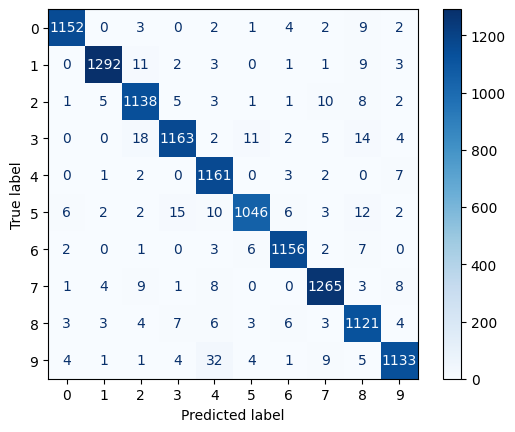

In [53]:
cm = ConfusionMatrixDisplay.from_estimator(mlp, X_val, y_val, cmap=plt.cm.Blues)
plt.show()

## Visualizing `Difficult` examples
---

In [54]:
# Get predicted probabilities for the validation set
y_proba_val = mlp.predict_proba(X_val)

# Identify misclassified points
misclassified_indices = np.where(y_val != y_pred_val)[0]

# Calculate discrepancies for misclassified points
discrepancies = np.abs(y_proba_val[misclassified_indices, y_val.iloc[misclassified_indices].astype(int)] - 
                       y_proba_val[misclassified_indices, y_pred_val[misclassified_indices].astype(int)])

# Get indices of misclassified points with the highest discrepancies
top_discrepancy_indices = misclassified_indices[np.argsort(-discrepancies)[:5]]

# Display predicted probabilities and true y values for these points
print("Predicted probabilities for misclassified points with highest discrepancies:")
print(y_proba_val[top_discrepancy_indices].round(3))
print("\nTrue y values for these points:")
print(y_val.iloc[top_discrepancy_indices].values)

Predicted probabilities for misclassified points with highest discrepancies:
[[0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.001 0.    0.999 0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.998 0.001 0.    0.001 0.   ]
 [0.    0.    0.    0.    0.998 0.    0.    0.    0.    0.002]
 [0.    0.    0.    0.    0.    0.005 0.    0.    0.995 0.   ]]

True y values for these points:
['3', '3', '8', '9', '6']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


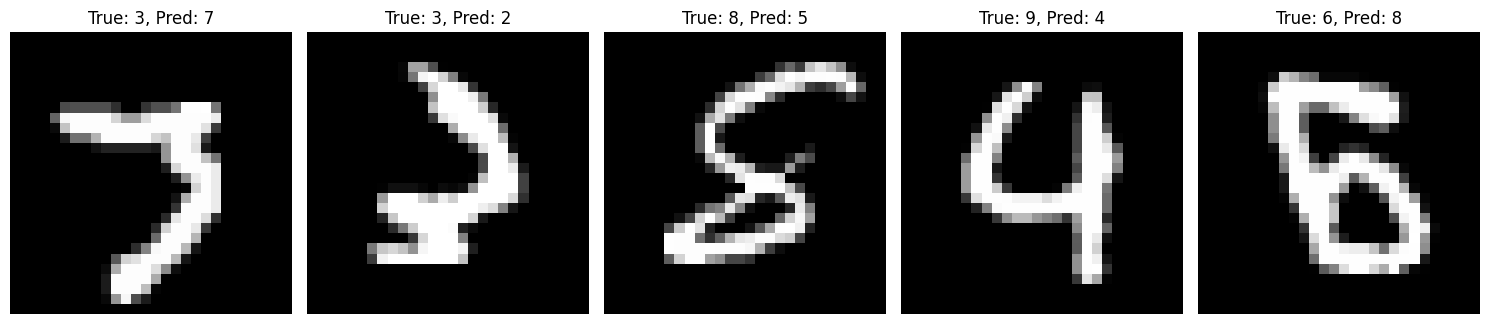

In [55]:
fig, axes = plt.subplots(1, len(top_discrepancy_indices), figsize=(15, 5))

for i, idx in enumerate(top_discrepancy_indices):
    ax = axes[i]
    image = X_val.iloc[idx].values.reshape(28, 28)  # Reshape the flattened image to 28x28
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(f"True: {y_val.iloc[idx]}, Pred: {y_pred_val[idx]}")

plt.tight_layout()
plt.show()

## Your Turn!
---

The **Fashion MNIST** dataset is a collection of 70,000 grayscale images of size 28x28 pixels, representing 10 categories of clothing items, such as T-shirts, trousers, and shoes. It is designed as a drop-in replacement for the MNIST dataset, providing a more challenging benchmark for machine learning models. Each image is labeled with one of the 10 classes, and the dataset is split into 60,000 training samples and 10,000 test samples.

In [59]:
# Fetch Fashion MNIST
fashion_mnist = fetch_openml('Fashion-MNIST', version=1, as_frame=False, parser = 'auto')

# Extract features and labels
X, y = fashion_mnist["data"], fashion_mnist["target"]

c:\Users\rhodes8\AppData\Local\miniconda3\envs\rfgap\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### 1. Data Prep.
Normalize the dataset and split in to 70/30 train-test set sizes. Further split the test set into test and validation sets.

In [60]:
X = X / 255.0  # Normalize pixel values to [0, 1]
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

# Split of validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## 2. Train a Model
Train an MLP using the ReLU activation function and a single hidden layer with 180 neurons. 

In [63]:
mlp = MLPClassifier(hidden_layer_sizes=(180,), activation = 'relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

c:\Users\rhodes8\AppData\Local\miniconda3\envs\rfgap\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(hidden_layer_sizes=(180,), max_iter=1000, random_state=42)

## 3. Model Validation
Using the validation set, evaluate the model performance. Create a confusion matrix; where are most of the misclasifications occuring?

In [ ]:
cm = ConfusionMatrixDisplay.from_estimator(mlp, X_val, y_val, cmap=plt.cm.Blues)
plt.show()